In [3]:
import pandas as pd
baseball = pd.read_csv("mlb-historic-ratios.csv")


In [4]:
baseball2 = baseball.dropna()
baseball2

,wins,attend
0,0.491,1712417
1,0.617,1797438
2,0.395,1206776
3,0.438,1200365
4,0.599,2288714
...,...,...
861,0.534,2416237
862,0.564,1510300
863,0.558,3178273
864,0.457,1374141


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
X = baseball2["wins"]
y = baseball2["attend"]

In [8]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
model.fit(X_train, y_train)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[5009070.94208423]]
y-axis intercept:  [-221503.36843152]


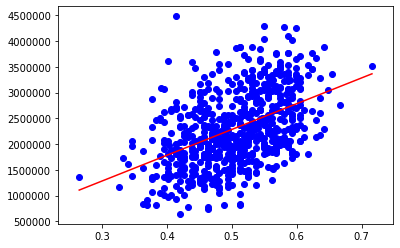

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X_train, y_train, c='blue')
x_train_min = np.array([[X_train.min()]])
x_train_max = np.array([[X_train.max()]])
y_min = model.predict(x_train_min)
y_max = model.predict(x_train_max)
plt.plot([x_train_min[0], x_train_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 412667738264.49255
R-squared (R2 ): 0.21626835788291754
